In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [2]:
sellers_data = pd.read_csv('../input/olist_sellers_dataset.csv')
product_cat = pd.read_csv('../input/product_category_name_translation.csv')
orders_dataset = pd.read_csv('../input/olist_orders_dataset.csv')
order_items_dataset = pd.read_csv('../input/olist_order_items_dataset.csv')
customers_dataset = pd.read_csv('../input/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv('../input/olist_geolocation_dataset.csv')
order_payments_dataset = pd.read_csv('../input/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('../input/olist_order_reviews_dataset.csv')
products_dataset = pd.read_csv('../input/olist_products_dataset.csv')



In [3]:
sellers_data.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [4]:
product_cat.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [5]:
orders_dataset.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [6]:
order_items_dataset.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [ ]:
customers_dataset.head(3)

In [ ]:
orders_dataset.order_status.value_counts()

In [ ]:
order_items_dataset

In [4]:
# Take a look at order data and country
df_all = pd.merge(orders_dataset, customers_dataset, on='customer_id')

In [5]:
df_all.columns.tolist()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

In [6]:
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all.order_purchase_timestamp)

In [ ]:
df_all

In [ ]:
df_all.dropna(inplace=True)
df_all['order_approved_at'] = pd.to_datetime(df_all.order_approved_at)
df_all['order_delivered_carrier_date'] = pd.to_datetime(df_all.order_delivered_carrier_date)
df_all['order_delivered_customer_date'] = pd.to_datetime(df_all.order_delivered_customer_date)
df_all['order_estimated_delivery_date'] = pd.to_datetime(df_all.order_estimated_delivery_date)

In [7]:
df_all['purchange_order_by_month_name'] = df_all.order_purchase_timestamp.dt.month_name()

In [ ]:
df_all

In [8]:
df_all['purchange_order_by_day_of_year'] = df_all.order_purchase_timestamp.dt.dayofyear

In [7]:
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchange_order_by_month_name,purchange_order_by_day_of_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,275
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,205
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,220
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,November,322
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,February,44
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,July,190
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,April,101
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,May,136
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,January,23
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,July,210


In [ ]:
sns.swarmplot('order_status', 'purchange_order_by_day_of_year', data=df_all[df_all.order_purchase_timestamp.dt.year < 2017])
plt.title("status by days of years")

In [22]:
stat_cat = df_all['order_status'].unique().tolist()
df_all['order_status'] = pd.Categorical(df_all['order_status'], categories=stat_cat, ordered=False)

customer_states = df_all['customer_state'].unique().tolist()
df_all['customer_state'] = pd.Categorical(df_all['customer_state'], categories=customer_states, ordered=False)

In [23]:
df_clean = df_all.dropna()
# df_clean.drop_duplicates(inplace=True)

In [24]:
df_clean.isna().any()

order_id                          False
customer_id                       False
order_status                      False
order_purchase_timestamp          False
order_approved_at                 False
order_delivered_carrier_date      False
order_delivered_customer_date     False
order_estimated_delivery_date     False
customer_unique_id                False
customer_zip_code_prefix          False
customer_city                     False
customer_state                    False
purchange_order_by_month_name     False
purchange_order_by_day_of_year    False
dtype: bool

In [25]:
df_clean.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchange_order_by_month_name,purchange_order_by_day_of_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,October,275
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,July,205
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,August,220


In [26]:
df_clean['order_delivered_customer_date'] = pd.to_datetime(df_clean.order_delivered_customer_date)
df_clean['order_approved_at'] = pd.to_datetime(df_clean.order_approved_at)
df_clean['order_delivered_carrier_date'] = pd.to_datetime(df_clean.order_delivered_carrier_date)
df_clean['order_delivered_customer_date'] = pd.to_datetime(df_clean.order_delivered_customer_date)
df_clean['order_estimated_delivery_date'] = pd.to_datetime(df_clean.order_estimated_delivery_date)

In [27]:
df_clean['delta_true_arrive_time'] = df_clean['order_delivered_customer_date'] -  df_clean['order_purchase_timestamp'] 

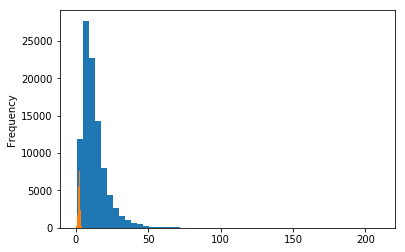

In [14]:
(df_clean.delta_true_arrive_time/(np.timedelta64(1, 'D'))).plot(kind='hist', bins=50)
(np.log(df_clean.delta_true_arrive_time/(np.timedelta64(1, 'D')))).plot(kind='hist', bins=50)




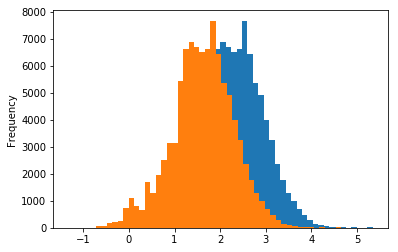

In [15]:
(np.log(df_clean.delta_true_arrive_time/(np.timedelta64(1, 'D')))).plot(kind='hist', bins=50)
(np.log(df_clean.delta_true_arrive_time/(np.timedelta64(2, 'D')))).plot(kind='hist', bins=50)




In [ ]:
(np.log(df_clean.delta_true_arrive_time/(np.timedelta64(1, 'D')))).plot(kind='hist', bins=50)



In [28]:
df_clean['delta_true_arrive_time'].dt.days()

TypeError: 'Series' object is not callable

In [ ]:
def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, len(x)+1)/n
    return x,y

r = np.log(df_clean.delta_true_arrive_time/(np.timedelta64(1, 'D')))
x,y = ecdf(r)

_ = plt.plot(x,y)
_ = plt.title('ECDF')
_ = plt.xlabel('data')

plt.show()
    
    
    

Let's try to see if we can treat the arival of items follows Gaussian distribution pattern, it looks like if we treat it as Gaussian distribution we would make 

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

r2 = df_clean.delta_true_arrive_time/(np.timedelta64(1, 'D'))
qqplot(r, line='s')
qqplot(r2, line='s', color='yellow')
pyplot.show()

Conclusion if we treat as the Gaussian distribution we are make a small error

In [ ]:
white_list = [_ for _ in df_all.order_status.unique().tolist() 
              if _ not in ['delivered','shipped']]
df_undelivered = df_all[df_all.order_status.isin(white_list)]

In [ ]:
df_undelivered['order_purchase_timestamp'] = pd.to_datetime(df_undelivered.order_purchase_timestamp)
df_undelivered['order_estimated_delivery_date'] = pd.to_datetime(df_undelivered.order_estimated_delivery_date)

In [ ]:
df_undelivered['estimated_arrival_time'] = df_undelivered.order_estimated_delivery_date - df_undelivered.order_purchase_timestamp


In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


r = df_undelivered.estimated_arrival_time.dt.days
r2 = np.log(r)
qqplot(r, line='s')
qqplot(r2, line='s', color='yellow')


pyplot.show()